In [2]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, jaccard_score
import seaborn as sns
import importlib

import cross_vals as cv




In [4]:
importlib.reload(cv)

<module 'cross_vals' from 'c:\\Users\\weiss\\Documents\\School\\Theory ofStat\\Project\\TheoryOfStatistics_Heart_CrossValidation\\cross_vals.py'>

In [5]:
cv.test_func()

hi


In [4]:
df = pd.read_csv('aheart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


The columns represent:
1) Age
2) Sex
3) Chest Pain Type (4 values)
4) Resting Blood Pressure
5) Serum Cholestoral in mg/dl
6) Fasting blood sugar > 120 mg/dl
7) Resting electrocardiagraphic results (values 0,1,2)
8) maximum heart rate achieved
9) Exercise induced angina
10) oldpeak: ST depression induced by exercise relative to rest
11) The slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

# Determine Correlation between predictor and response

In [5]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [5]:
df.corrwith(df['target'])

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
target      1.000000
dtype: float64

Thus, we expect that the most significant factors in our model will be:
* Chest Pain type
* maximum heart rate achieved (thalach)
* Exercise induced angina (exang)
* ST depression induced by exercise relative to rest (oldpeak)
* Number of major vessels colored by flourosopy

The factors that will have some effect:
* Slope of the peak exercise ST segment
* thal
* Age
* Sex

The factors unlikely to be significant:
* Resting Blood Pressure
* Serum cholesterol
* Resting electrocardiographic results

## Check Data Balance

In [42]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

# EDA

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [44]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [48]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

<AxesSubplot:>

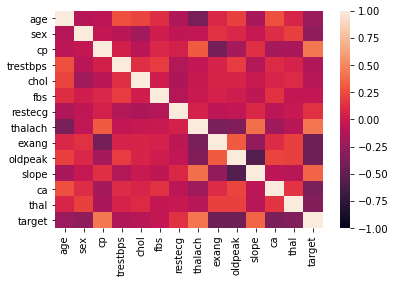

In [56]:
corrs = df.corr()
sns.heatmap(corrs, annot=False, vmin=-1, vmax=1

# Todo: Examine collinearity

In [6]:
#Loading the dataset
#data = load_breast_cancer(as_frame = True)
#df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [36]:
#Implementing cross validation
def perform_cross_validation(num_folds, df):
    kf = KFold(n_splits=num_folds, random_state=None)
    model = LogisticRegression(solver= 'liblinear')

    acc_score = []
    jacc_score = []

    for train_index , test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train, y_test = y[train_index] , y[test_index]

        model.fit(X_train,y_train)
        pred_values = model.predict(X_test)
        acc = accuracy_score(y_test, pred_values)
        jacc = jaccard_score(y_test, pred_values)
        acc_score.append(acc)
        jacc_score.append(jacc)

    avg_acc_score = sum(acc_score)/num_folds
    avg_jacc_score = sum(jacc_score)/num_folds

    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print()
    print('Jaccard Score of each fold - {}'.format(jacc_score))
    print('Avg Jaccard : {}'.format(avg_jacc_score))


In [37]:
perform_cross_validation(5, df)

accuracy of each fold - [0.8829268292682927, 0.8585365853658536, 0.8731707317073171, 0.8146341463414634, 0.8048780487804879]
Avg accuracy : 0.846829268292683

Jaccard Score of each fold - [0.8016528925619835, 0.7769230769230769, 0.7903225806451613, 0.7076923076923077, 0.6774193548387096]
Avg Jaccard : 0.7508020425322479


In [31]:
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, random_state=None)
model = LogisticRegression(solver= 'liblinear')
result = cross_val_score(model , X, y, cv = kf)

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.846829268292683


In [45]:
y_true = np.array([[0, 1, 1],
                    [1, 1, 0]])
y_pred = np.array([[1, 1, 1],
                   [1, 0, 0]])
print(accuracy_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred, normalize=False))

0.0
0


In [46]:
jaccard_score(y_true[0], y_pred[0])

0.6666666666666666

In [47]:
jaccard_score(y_true, y_pred, average=None)

array([0.5, 0.5, 1. ])

In [48]:
print(accuracy_score(y_true[0], y_pred[0]))

0.6666666666666666


In [29]:
#Implementing Multiple Prediction Cross Validation
def perform_MPCV(num_folds, df):
    kf = KFold(n_splits=num_folds, random_state=None)
    model = LogisticRegression(solver= 'liblinear')

    acc_score = []
    jacc_score = []

    for test_index, train_index in kf.split(X):
        X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train, y_test = y[train_index] , y[test_index]

        model.fit(X_train,y_train)
        pred_values = model.predict(X_test)
        acc = accuracy_score(y_test, pred_values)
        jacc = jaccard_score(y_test, pred_values)
        acc_score.append(acc)
        jacc_score.append(jacc)

    avg_acc_score = sum(acc_score)/num_folds
    avg_jacc_score = sum(jacc_score)/num_folds

    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print()
    print('Jaccard Score of each fold - {}'.format(jacc_score))
    print('Avg Jaccard : {}'.format(avg_jacc_score))


In [30]:
perform_MPCV(10, df)

accuracy of each fold - [0.8177874186550976, 0.8101952277657267, 0.8275488069414316, 0.8373101952277657, 0.8080260303687635, 0.8223185265438786, 0.8331527627302275, 0.7952329360780065, 0.8299024918743229, 0.8179848320693391]
Avg accuracy : 0.8199459228254561

Jaccard Score of each fold - [0.7026548672566372, 0.691358024691358, 0.722027972027972, 0.7335701598579041, 0.6844919786096256, 0.7177280550774526, 0.7105263157894737, 0.6802030456852792, 0.7119266055045872, 0.7108433734939759]
Avg Jaccard : 0.7065330397994265


In [27]:
perform_cross_validation(10, df)

accuracy of each fold - [0.8640776699029126, 0.9029126213592233, 0.8640776699029126, 0.8640776699029126, 0.8349514563106796, 0.9313725490196079, 0.7941176470588235, 0.8137254901960784, 0.7843137254901961, 0.803921568627451]
Avg accuracy : 0.8457548067770798

Jaccard Score of each fold - [0.7704918032786885, 0.8360655737704918, 0.7971014492753623, 0.7666666666666667, 0.7571428571428571, 0.8703703703703703, 0.676923076923077, 0.7076923076923077, 0.6333333333333333, 0.696969696969697]
Avg Jaccard : 0.7512757135422852
